In [196]:
#library & package. 
#Jalankan ulang jika menambahkan library baru
import json
import tweepy
import re
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [197]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

In [198]:
# membuat variabel authentikasi dan api
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [ ]:
#Apa kata kunci yang ingin kalian cari di twitter dan kenapa. 
#jelaskan singkat pada sel ini






Kata kunci yang ingin saya cari adalah mengenai **#pelecehanseksual**

Beberapa hari/minggu yang lalu, sempat trending tentang seorang mahasiswi yang dilecehkan oleh dosennya. Mahasiswi tersebut berkuliah di UNSRI. Akan tetapi, pelaku yang merupakan seorang dosen, yang memiliki kekuasaan dan koneksi, seakan kurang bertanggung jawab. Akibatnya, mahasiswi tersebut dikabarkan tertunda status kelulusannya, dan sampai sekarang saya belum tahu kelanjutannya seperti apa. Kemudian yang baru saja trending, seorang mahasiswi yang berkuliah di kampus UB, dikabarkan melakukan bunuh diri, dikarenakan depresi berat, salah satu alasannya adalah karena hamil yang dilakukan oleh 'oknum' polisi. Kalau yang melakukan adalah 'oknum' polisi, dimana tersangka memiliki beberapa akses dari pejabat-pejabat yang berkepentingan, kemudian tersangka dijatuhkan hukuman 5 tahun yang menurut saya itu kurang banget, lalu muncul pertanyaan, kepada siapa lagi harus melapor ? sampai kapan hukum di Indonesia sebegitu miris ? sampai kapan hukum di Indonesia dapat dibeli dengan uang ? sampai kapan rakyat biasa harus dihukum normal atau bisa jadi lebih berat ketimbang 'oknum' yang memiliki akses terhadap petinggi - petinggi ? entalah, saya yakin kedua kasus tersebut hanyalah puncak dari gunung es, dimana masih terdapat banyak sekali kasus yang belum terungkap. Hukum di Indonesia hanyalah sebuah utopia manis. Sejujurnya, saya merasa miris, tapi mau bagaimana lagi, hidup harus terus berlanjut..

In [199]:
#pelecehanseksual
kata_kunci= '#pelecehanseksual'
tweets = tweepy.Cursor(api.search_tweets, q = kata_kunci).items(300)
print(tweets)

In [200]:
# print the data dan masukkan kedalam list
# di run 1x aja, biar tidak terjadi bug
tw = []
for kumpulan_tweet in tweets:
    tw.append(kumpulan_tweet.text)

In [201]:
print(tw)  

['@reyhan2f Ada rasa "merasa gak bisa menjaga diri" ada rasa "malu" ada rasa "gak berharga". Salah satu perasaan korb… https://t.co/PF7XkKQkW8', '@detikcom #pelecehanseksual #menolaklupa', 'Aku jd korban pelecehan kok malah dicampakkan, hnya Krn tak ada bukti jadinya dicampakkan keluarga seenaknya 😥😞. Ha… https://t.co/eFy58yxLZA', 'Tuntaskan Kasus Dan Akarnya\n\n#Jokowi #hukum #Polri #kapolri #ASNPolri #KPK #pelecehanseksual #korupsi #KPKUpdates… https://t.co/xFPF4eXaxd', 'Oknum Dosen Unsri Resmi Ditahan di Mapolda Sumatera Selatan https://t.co/Q57iyYBDdT #Asusila #Dosen #PelecehanSeksual #UniversitasSriwijaya', 'Ada 2 laporan terpisah atas dosen A. Dimana laporan pertama dengan korban mahasiswi berinisal DR. Kemudian laporan… https://t.co/QGQDKoOQEQ', '💔\n\n#pelecehanseksual \n#kekerasanseksual \n#perempuan\n#wanita\n#mentalillness \n#mentalhealthsupport https://t.co/Mo3UmRlBKg', 'Setelah lama malang melintang, tiba2 Siskaeee ditangkap. Jangan sampe kasus Randy "The Rapist" dan pelece

dapat dilihat bahwa, dari 300 tweet yang diperoleh, terdapat beberapa duplikasi tweet, duplikasi ini selanjutnya akan dihapus

In [202]:
# menghilangkan data duplikat dan membuat dataframe
twit = []
for i in tw:
    if i not in twit:
        twit.append(i) 

df = pd.DataFrame({'tweet' : twit})
display(df)

,tweet
0,"@reyhan2f Ada rasa ""merasa gak bisa menjaga di..."
1,@detikcom #pelecehanseksual #menolaklupa
2,"Aku jd korban pelecehan kok malah dicampakkan,..."
3,Tuntaskan Kasus Dan Akarnya\n\n#Jokowi #hukum ...
4,Oknum Dosen Unsri Resmi Ditahan di Mapolda Sum...
...,...
84,Hallo Sobat Suara! \n\nApakah kalian tahu bahw...
85,Menteri Pemberdayaan Perempuan dan Perlindunga...
86,"Kata Kasar, Seksis, Serangan Fisik, Dianggap C..."
87,Pelecehan Pegawai KPI Dinyatakan Langgar HAM h...


In [203]:
# save hasilnya, misal nama filenya adalah df.csv
# tujuan save ini adalah, agar tweet dalam datanya tidak berubah saat melakukan pengerjaan di waktu
# yang berbeda

# di run 1x aja
df.to_csv('df.csv', index = False, header=True)

In [204]:
# membuka kembali data yang telah tersimpan
df = pd.read_csv('df.csv')
display(df)

,tweet
0,"@reyhan2f Ada rasa ""merasa gak bisa menjaga di..."
1,@detikcom #pelecehanseksual #menolaklupa
2,"Aku jd korban pelecehan kok malah dicampakkan,..."
3,Tuntaskan Kasus Dan Akarnya\n\n#Jokowi #hukum ...
4,Oknum Dosen Unsri Resmi Ditahan di Mapolda Sum...
...,...
84,Hallo Sobat Suara! \n\nApakah kalian tahu bahw...
85,Menteri Pemberdayaan Perempuan dan Perlindunga...
86,"Kata Kasar, Seksis, Serangan Fisik, Dianggap C..."
87,Pelecehan Pegawai KPI Dinyatakan Langgar HAM h...


#expected resultnya ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#ambil data pada twitter dengan kata kunci tersebut.
#ambil sebanyak 300 tweet
#masukkan pada datarame dan tampilkan dataframenya



,tweet
0,RT @bwinsandi3: @TelkomIndonesia yang merupaka...
1,RT @GustinaKlis: Pray for semeru\n#semeru #pra...
2,RT @twuicei: #BUMNGercepBantuSemeru\nMenteri B...
3,RT @VICHO_____: BUMN bergerak cepat dalam memb...
4,RT @ArtOfpol: Menteri BUMN @erickthohir Pastik...
...,...
195,RT @IdNenek777: Kementerian BUMN bergerak cepa...
196,RT @chenx_lionx: Erick Thohir : BUMN siap memb...
197,"Allhamdulillah, Pemerintah hadir untuk menjami..."
198,"RT @silverQ28: Erick Thohir mengatakan,\nDenga..."


In [205]:
# text preprocessing
#1. Case folding
# membuat kumpulan kata pada kolom tersebut menjadi lowercase   
df['clean_tweet'] = df['tweet'].str.lower()

# menghilangkan alamat url
df['clean_tweet'] = df['clean_tweet'].replace('http\S+|www\S+|https\S+', '', regex = True)  

# mendelete username
df['clean_tweet'] = df['clean_tweet'].replace('@[\w]+', '', regex = True)

# menghapus angka yang terdapat dalam setiap tweet
df['clean_tweet'] = df['clean_tweet'].replace('\d+', '', regex = True)

# menghapus tanda baca
df['clean_tweet'] = df['clean_tweet'].str.translate(str.maketrans("","",string.punctuation))

# menghapus whitespace
df['clean_tweet'] = df['clean_tweet'].str.strip()

# menghilangkan karakter khusus
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

# cek hasil
for i in df['clean_tweet']:
    print(i)

ada rasa merasa gak bisa menjaga diri ada rasa malu ada rasa gak berharga salah satu perasaan korb
pelecehanseksual menolaklupa
aku jd korban pelecehan kok malah dicampakkan hnya krn tak ada bukti jadinya dicampakkan keluarga seenaknya  ha
tuntaskan kasus dan akarnya

jokowi hukum polri kapolri asnpolri kpk pelecehanseksual korupsi kpkupdates
oknum dosen unsri resmi ditahan di mapolda sumatera selatan  asusila dosen pelecehanseksual universitassriwijaya
ada  laporan terpisah atas dosen a dimana laporan pertama dengan korban mahasiswi berinisal dr kemudian laporan


pelecehanseksual 
kekerasanseksual 
perempuan
wanita
mentalillness 
mentalhealthsupport
setelah lama malang melintang tiba siskaeee ditangkap jangan sampe kasus randy the rapist dan pelecehan mahasi
rt  dimana tingkat keadilan terhadap korban pelecehan seksual  bagaimana para korban berani speak up tentang hal ini kalau saat m
jadi gimana nih kasus laki laki brengsektidak kalah horor bukan
thread pelecehanseksual theoneandon

In [206]:
#2. stopwords
stopwords_indo = stopwords.words('indonesian')

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_indo)]))

# cek hasil
for i in df['clean_tweet']:
    print(i)

gak menjaga malu gak berharga salah perasaan korb
pelecehanseksual menolaklupa
jd korban pelecehan dicampakkan hnya krn bukti dicampakkan keluarga ha
tuntaskan akarnya jokowi hukum polri kapolri asnpolri kpk pelecehanseksual korupsi kpkupdates
oknum dosen unsri resmi ditahan mapolda sumatera selatan asusila dosen pelecehanseksual universitassriwijaya
laporan terpisah dosen a dimana laporan korban mahasiswi berinisal dr laporan
pelecehanseksual kekerasanseksual perempuan wanita mentalillness mentalhealthsupport
malang melintang siskaeee ditangkap sampe randy the rapist pelecehan mahasi
rt dimana tingkat keadilan korban pelecehan seksual korban berani speak up m
gimana nih laki laki brengsektidak kalah horor thread pelecehanseksual theoneandonly
penyelidikan penyidikan polda sumatra selatan menetapkan dosen universitas sriwijaya berinisial
rt eheheh reza dosen inisialr reza unsri dosenunsri kampusunsri pelecehanseksual pelecehandiunsri ht
serok ruupks unsri pelecehanseksual
astaga dosen 

In [208]:
# 3. remove slangwords
# membuat slang wordnya 
slang_word = ['rt', 'ht', 'nya', 'sa', 'b', 'ck', 'leuwih', 'm', 'twit', 'udah', 
              'the', 'of', 'for', 'all', 'victims', 'to', 'get', 'justify', 'is', 'best', 'thing',
              'that', 'ever', 'happened', 'in', 'and', 'all', 'thos', 't', 'pe', 'panggila', 'pas'
              'maybe after this i will mute', 'stuffs', 'emotional', 'maybe', 'after', 'will', 'mute',
              'you ruined us our life so please', 'so', 'dr', 'mles', 'gaje', 'yah', 'up', 'membua',
              'a', 'no', 'wa', 'gw', 'ga', 'm', 'par', 'dgn', 'p', 'k', 'i', 'terj', 'ma', 'be', 'ya', 
              'ent', 'udh', 'ngga', 'speak', 'you', 'lengkepna', 'hallo', 'tau', 'sih', 'serin', 'korb', 
              'ayuk', 'nihudh', 'unplash eric ward', 'mahas', 'seoran', 'jd', 'nih', 'eheheh', 'gak', 
              'ruined', 'us', 'our', 'life', 'please', 'cant', 'handle', 'this', 'gimana', 'mahasi', 'ha', 
              'aja', 'yg', 'peremp', 'karna', 'hnya', 'krn' ,'theoneandonly', 'gtgt', 'yuk', 'nggak', 'loh']

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (slang_word)]))

# memeriksa kembali
for i in df['clean_tweet']:
    print(i) 

menjaga malu berharga salah perasaan
pelecehanseksual menolaklupa
korban pelecehan dicampakkan bukti dicampakkan keluarga
tuntaskan akarnya jokowi hukum polri kapolri asnpolri kpk pelecehanseksual korupsi kpkupdates
oknum dosen unsri resmi ditahan mapolda sumatera selatan asusila dosen pelecehanseksual universitassriwijaya
laporan terpisah dosen dimana laporan korban mahasiswi berinisal laporan
pelecehanseksual kekerasanseksual perempuan wanita mentalillness mentalhealthsupport
malang melintang siskaeee ditangkap sampe randy rapist pelecehan
dimana tingkat keadilan korban pelecehan seksual korban berani
laki laki brengsektidak kalah horor thread pelecehanseksual
penyelidikan penyidikan polda sumatra selatan menetapkan dosen universitas sriwijaya berinisial
reza dosen inisialr reza unsri dosenunsri kampusunsri pelecehanseksual pelecehandiunsri
serok ruupks unsri pelecehanseksual
astaga dosen bimbingan foto seksi mahasiswi netizen bejat baca selengkapnya
terbukti memperkosa bripda randy 

In [209]:
# tampilkan dataframe
display(df)

,tweet,clean_tweet
0,"@reyhan2f Ada rasa ""merasa gak bisa menjaga di...",menjaga malu berharga salah perasaan
1,@detikcom #pelecehanseksual #menolaklupa,pelecehanseksual menolaklupa
2,"Aku jd korban pelecehan kok malah dicampakkan,...",korban pelecehan dicampakkan bukti dicampakkan...
3,Tuntaskan Kasus Dan Akarnya\n\n#Jokowi #hukum ...,tuntaskan akarnya jokowi hukum polri kapolri a...
4,Oknum Dosen Unsri Resmi Ditahan di Mapolda Sum...,oknum dosen unsri resmi ditahan mapolda sumate...
...,...,...
84,Hallo Sobat Suara! \n\nApakah kalian tahu bahw...,sobat suara pelecehanseksual memiliki jenis pe...
85,Menteri Pemberdayaan Perempuan dan Perlindunga...,menteri pemberdayaan perempuan perlindungan an...
86,"Kata Kasar, Seksis, Serangan Fisik, Dianggap C...",kasar seksis serangan fisik dianggap canda kpi...
87,Pelecehan Pegawai KPI Dinyatakan Langgar HAM h...,pelecehan pegawai kpi dinyatakan langgar ham k...


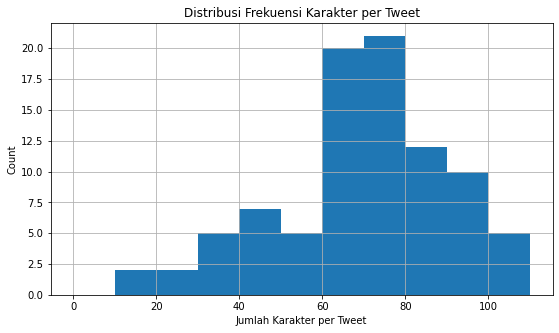

In [210]:
# Text Analysis
# a. Distribusi Frekuensi Karakter per Tweet

# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (9,5))

# plot the data
bin_range = np.arange(0, 120, 10)
df['clean_tweet'].str.len().hist(bins=bin_range)

# membuat judul dan label untuk x dan y axis
plt.title('Distribusi Frekuensi Karakter per Tweet')
plt.xlabel('Jumlah Karakter per Tweet')
plt.ylabel('Count')

plt.show()

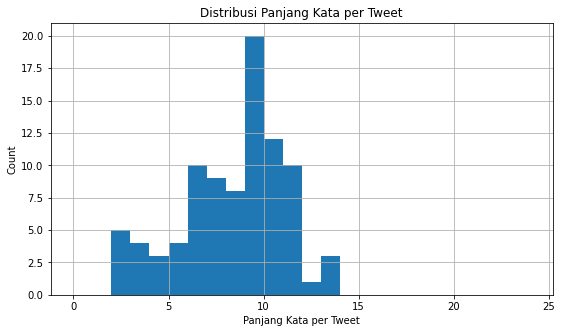

In [211]:
# b. Distribusi panjang kata per tweet

# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (9,5))

# plot the data
bin_range = np.arange(0, 25)
df['clean_tweet'].str.split().map(lambda x: len(x)).hist(bins=bin_range)

# membuat judul dan label untuk x dan y axis
plt.title('Distribusi Panjang Kata per Tweet')
plt.xlabel('Panjang Kata per Tweet')
plt.ylabel('Count')

plt.show()

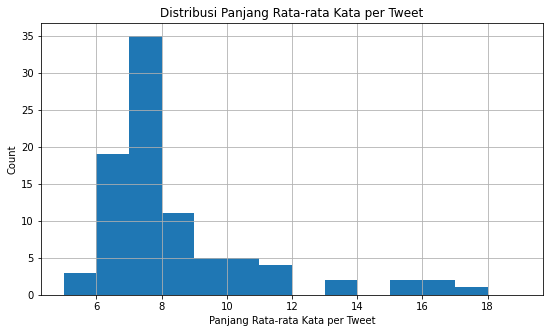

In [212]:
# c. Distribusi panjang rata-rata kata per tweet

# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (9,5))

# plot the data
bin_range = np.arange(5, 20)
df['clean_tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(bins=bin_range)

# membuat judul dan label untuk x dan y axis
plt.title('Distribusi Panjang Rata-rata Kata per Tweet')
plt.xlabel('Panjang Rata-rata Kata per Tweet')
plt.ylabel('Count')

plt.show()

In [213]:
# d. Distribusi Kata

# melakukan tokenization pada dataset
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: word_tokenize(str(x)))
 
# memasukkan pada semua token tersebut pada satu list yang sama
 
clean_tweets = [word for tweet in df['clean_tweet'] for word in tweet]
 
# melihat berapa sample dan keluarannya
fqdist = FreqDist(clean_tweets)

print(fqdist)

<FreqDist with 359 samples and 702 outcomes>


In [214]:
# Untuk mengetahui kata dan jumlah dari masing-masing, dapat menggunakan :

# menampilkan frekuensi kata terbanyak dengan limit 15
freq_kata = fqdist.most_common(20)

print(freq_kata)

[('pelecehanseksual', 43), ('pelecehan', 34), ('seksual', 24), ('unsri', 22), ('korban', 17), ('dosen', 16), ('mahasiswi', 16), ('perempuan', 9), ('universitas', 8), ('oknum', 7), ('sriwijaya', 7), ('dimana', 6), ('wanita', 6), ('keadilan', 6), ('viral', 6), ('kampus', 6), ('suara', 6), ('selatan', 4), ('laporan', 4), ('polda', 4)]


In [215]:
# membuat ke dalam dataframe
f_kata = pd.DataFrame(freq_kata)
f_kata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20 non-null     object
 1   1       20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


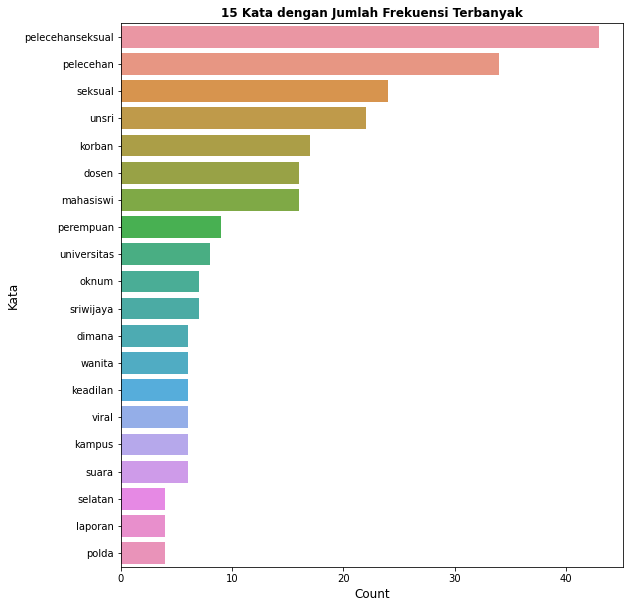

In [216]:
# mengatur figure
fig, ax = plt.subplots(figsize = (9,10))

# plot the data 
sns.barplot(data = f_kata, x = f_kata[1], y = f_kata[0], orient = 'h')

# membuat judul dan label untuk x dan y axis
plt.title('15 Kata dengan Jumlah Frekuensi Terbanyak', fontweight = 'bold')
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Kata', fontsize = 12)

plt.show()

In [217]:
# e. Distribusi bi-gram

hasil = pd.Series(nltk.ngrams(clean_tweets, 2)).value_counts()[:15]
print(hasil)

(pelecehan, seksual)                  21
(korban, pelecehan)                   10
(oknum, dosen)                         7
(universitas, sriwijaya)               7
(pelecehanseksual, unsri)              5
(suara, pelecehanseksual)              4
(sobat, suara)                         4
(unsri, pelecehanseksual)              4
(unsri, dosenunsri)                    3
(mahasiswi, unsri)                     3
(dosen, unsri)                         3
(stop, pelecehan)                      3
(pelecehanseksual, noviawidyasari)     3
(polda, sumatra)                       3
(sumatra, selatan)                     3
dtype: int64


In [218]:
# unpack list di dalam series
text = df['clean_tweet'].explode()

words = []
for i in text:
    words.append(i)
    
words_2 = ' '.join(words)

Word Cloud


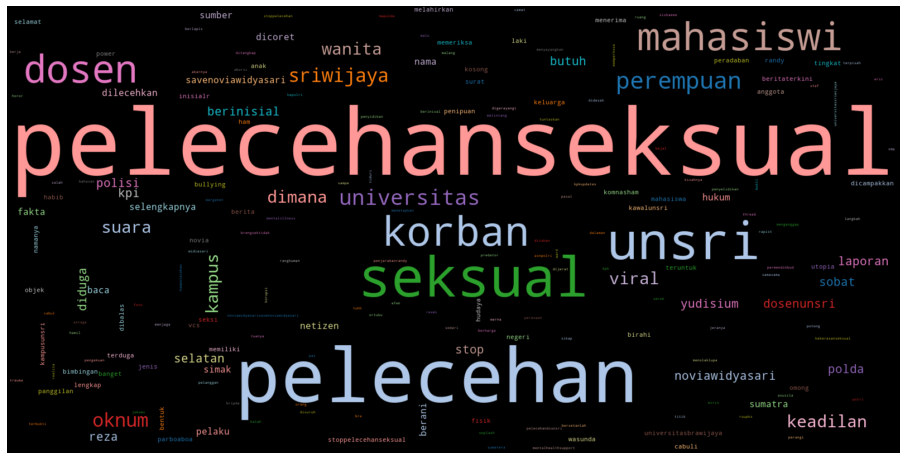

In [219]:
# mencoba untuk membuat wordcloud

print('Word Cloud')
# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (16,14))

# membuat wordcloud
wc = WordCloud(width=1600, height=800, 
               max_font_size=200, max_words = 200, collocations = False,
               colormap = 'tab20', random_state = 7, relative_scaling = 0.9).generate(words_2)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [220]:
# menampilkan dataframe setelah dilakukan pembersihan
# note : yang ini jangan di run berulang, nanti spasi pada kolom clean_tweetnya akan bertambah

# di run 1x aja
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join(x))

In [221]:
# menampilkan dataframe setelah dilakukan pembersihan
display(df)
for i in df['clean_tweet']:
    print(i)

,tweet,clean_tweet
0,"@reyhan2f Ada rasa ""merasa gak bisa menjaga di...",menjaga malu berharga salah perasaan
1,@detikcom #pelecehanseksual #menolaklupa,pelecehanseksual menolaklupa
2,"Aku jd korban pelecehan kok malah dicampakkan,...",korban pelecehan dicampakkan bukti dicampakkan...
3,Tuntaskan Kasus Dan Akarnya\n\n#Jokowi #hukum ...,tuntaskan akarnya jokowi hukum polri kapolri a...
4,Oknum Dosen Unsri Resmi Ditahan di Mapolda Sum...,oknum dosen unsri resmi ditahan mapolda sumate...
...,...,...
84,Hallo Sobat Suara! \n\nApakah kalian tahu bahw...,sobat suara pelecehanseksual memiliki jenis pe...
85,Menteri Pemberdayaan Perempuan dan Perlindunga...,menteri pemberdayaan perempuan perlindungan an...
86,"Kata Kasar, Seksis, Serangan Fisik, Dianggap C...",kasar seksis serangan fisik dianggap canda kpi...
87,Pelecehan Pegawai KPI Dinyatakan Langgar HAM h...,pelecehan pegawai kpi dinyatakan langgar ham k...


menjaga malu berharga salah perasaan
pelecehanseksual menolaklupa
korban pelecehan dicampakkan bukti dicampakkan keluarga
tuntaskan akarnya jokowi hukum polri kapolri asnpolri kpk pelecehanseksual korupsi kpkupdates
oknum dosen unsri resmi ditahan mapolda sumatera selatan asusila dosen pelecehanseksual universitassriwijaya
laporan terpisah dosen dimana laporan korban mahasiswi berinisal laporan
pelecehanseksual kekerasanseksual perempuan wanita mentalillness mentalhealthsupport
malang melintang siskaeee ditangkap sampe randy rapist pelecehan
dimana tingkat keadilan korban pelecehan seksual korban berani
laki laki brengsektidak kalah horor thread pelecehanseksual
penyelidikan penyidikan polda sumatra selatan menetapkan dosen universitas sriwijaya berinisial
reza dosen inisialr reza unsri dosenunsri kampusunsri pelecehanseksual pelecehandiunsri
serok ruupks unsri pelecehanseksual
astaga dosen bimbingan foto seksi mahasiswi netizen bejat baca selengkapnya
terbukti memperkosa bripda randy 

note : **dalam analisis teks di atas, saya tidak melakukan stemming kata. Alasannya adalah agar dapat lebih jelas terlihat kata yang sering muncul di dalam kumpulan tweet tersebut, sehingga dapat lebih mudah untuk menentukan temanya.**

In [ ]:
# Sentiment Analysis : melihat sentimen negatif, netral, atau positif

In [222]:
pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()

# melihat isi datanya
# coba mengambil 5 data
print(pos_kata[0:5])

['absah\n', 'absolut\n', 'acuan\n', 'afdol\n', 'ahli\n']


In [223]:
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()  
# melihat isi datanya
# coba mengambil 5 data
print(neg_kata[0:5])

['acak-acakan\n', 'adu\n', 'adu domba\n', 'aib\n', 'akal bulus\n']


In [224]:
# membuat list dari data yang sudah dibersihkan
items = []
for i in df['clean_tweet']:
    items.append(i)

In [225]:
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']
for item in items:
    print(item.strip())
    tweets = item.strip().split() #tokenization
    # print(tweets)
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif
    
    for tweet in tweets:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    
    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))

menjaga malu berharga salah perasaan
menjaga
 ['positif']
berharga
 ['positif']
salah
 ['negatif']
positif: 2
negatif: 1
pelecehanseksual menolaklupa
pelecehanseksual
 ['negatif']
positif: 0
negatif: 1
korban pelecehan dicampakkan bukti dicampakkan keluarga
korban
 ['negatif']
pelecehan
 ['negatif']
dicampakkan
 ['negatif']
dicampakkan
 ['negatif']
positif: 0
negatif: 4
tuntaskan akarnya jokowi hukum polri kapolri asnpolri kpk pelecehanseksual korupsi kpkupdates
pelecehanseksual
 ['negatif']
korupsi
 ['negatif']
positif: 0
negatif: 2
oknum dosen unsri resmi ditahan mapolda sumatera selatan asusila dosen pelecehanseksual universitassriwijaya
oknum
 ['negatif']
resmi
 ['positif']
ditahan
 ['negatif']
pelecehanseksual
 ['negatif']
positif: 1
negatif: 3
laporan terpisah dosen dimana laporan korban mahasiswi berinisal laporan
korban
 ['negatif']
positif: 0
negatif: 1
pelecehanseksual kekerasanseksual perempuan wanita mentalillness mentalhealthsupport
pelecehanseksual
 ['negatif']
positif: 0

positif: 0
negatif: 3
sobat suara pelecehanseksual memiliki jenis pelecehan seksual
sobat
 ['positif']
pelecehanseksual
 ['negatif']
pelecehan
 ['negatif']
positif: 1
negatif: 2
sobat suara pelecehanseksual bentuk simak suara
sobat
 ['positif']
pelecehanseksual
 ['negatif']
positif: 1
negatif: 1
polda sumatra selatan memeriksa oknum dosen berinisial diduga pelecehan seksual
oknum
 ['negatif']
diduga
 ['negatif']
pelecehan
 ['negatif']
positif: 0
negatif: 3
parboaboa pencabulan pelecehanseksual pelecehan jaktim berita beritaterkini
pencabulan
 ['negatif']
pelecehanseksual
 ['negatif']
pelecehan
 ['negatif']
positif: 0
negatif: 3
parboaboa beritaterkini beritaterbaru unsri pelecehanseksual
pelecehanseksual
 ['negatif']
positif: 0
negatif: 1
penipuan pelecehan anggota vcs nama faisal arya poetra viral
penipuan
 ['negatif']
pelecehan
 ['negatif']
positif: 0
negatif: 2
penipuan pelecehan anggota vcs nama winandi sidiq anugerah viral
penipuan
 ['negatif']
pelecehan
 ['negatif']
positif: 0
ne

In [226]:
hasil = []
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']

for item in items:
    print(item.strip())
    tweets = item.strip().split() #tokenization
    # print(tweets)
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif
    
    for tweet in tweets:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    
    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))
    hasil.append(count_p - count_n)
    print ("-----------------------------------------------------")

menjaga malu berharga salah perasaan
menjaga
 ['positif']
berharga
 ['positif']
salah
 ['negatif']
positif: 2
negatif: 1
-----------------------------------------------------
pelecehanseksual menolaklupa
pelecehanseksual
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
korban pelecehan dicampakkan bukti dicampakkan keluarga
korban
 ['negatif']
pelecehan
 ['negatif']
dicampakkan
 ['negatif']
dicampakkan
 ['negatif']
positif: 0
negatif: 4
-----------------------------------------------------
tuntaskan akarnya jokowi hukum polri kapolri asnpolri kpk pelecehanseksual korupsi kpkupdates
pelecehanseksual
 ['negatif']
korupsi
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
oknum dosen unsri resmi ditahan mapolda sumatera selatan asusila dosen pelecehanseksual universitassriwijaya
oknum
 ['negatif']
resmi
 ['positif']
ditahan
 ['negatif']
pelecehanseksual
 ['negatif']
positif: 1
negatif: 3
------------------------

positif: 0
negatif: 2
-----------------------------------------------------
viral mahasiswi gagal yudisium gegara korban pelecehan seksual baca selengkapnya
gagal
 ['negatif']
korban
 ['negatif']
pelecehan
 ['negatif']
positif: 0
negatif: 3
-----------------------------------------------------
oknum dosen unsri terduga pelaku pelecehanseksual dipecat poldasumsel agendakan pemeriksaan senin
oknum
 ['negatif']
pelecehanseksual
 ['negatif']
dipecat
 ['negatif']
pemeriksaan
 ['positif']
positif: 1
negatif: 3
-----------------------------------------------------
pelecehanseksual heart breaking
pelecehanseksual
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
pelecehanseksual savenoviawidyasari
pelecehanseksual
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
wanita butuh keadilan keadilan omong kosong stop pelecehan wanita
pelecehan
 ['negatif']
positif: 0
negatif: 1
---------------------------------------------

In [227]:
# menampilkan hasilnya
print ("Nilai rata-rata: "+str(np.mean(hasil)))
print ("Standar deviasi: "+str(np.std(hasil)))

Nilai rata-rata: -1.2247191011235956
Standar deviasi: 1.330310506870981


dari hasil perhitungan di atas, dapat dilihat bahwa rata-rata sentimen dalam tweet dengan kata kunci = 'pelecehanseksual' adalah sentimen negatif

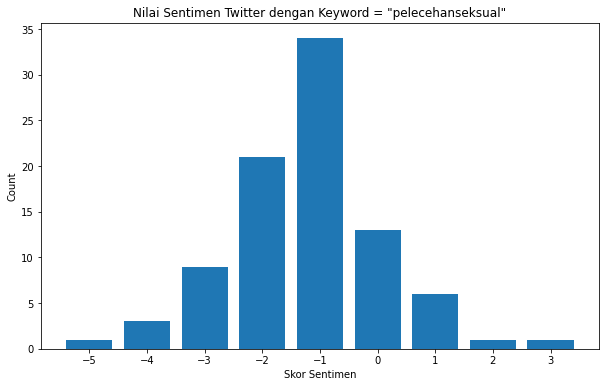

In [228]:
# membuat ukuran figure
fig, ax = plt.subplots(figsize = (10,6))

# plot the data
labels, counts = np.unique(hasil, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)

# memberi judul dan label untuk x dan y axis
plt.title('Nilai Sentimen Twitter dengan Keyword = "pelecehanseksual"')
plt.xlabel('Skor Sentimen')
plt.ylabel('Count')

plt.show()

In [229]:
# memasukkan hasilnya pada dataframe dengan nama kolom "sentiment"
df['sentimen'] = hasil
display(df)

,tweet,clean_tweet,sentimen
0,"@reyhan2f Ada rasa ""merasa gak bisa menjaga di...",menjaga malu berharga salah perasaan,1
1,@detikcom #pelecehanseksual #menolaklupa,pelecehanseksual menolaklupa,-1
2,"Aku jd korban pelecehan kok malah dicampakkan,...",korban pelecehan dicampakkan bukti dicampakkan...,-4
3,Tuntaskan Kasus Dan Akarnya\n\n#Jokowi #hukum ...,tuntaskan akarnya jokowi hukum polri kapolri a...,-2
4,Oknum Dosen Unsri Resmi Ditahan di Mapolda Sum...,oknum dosen unsri resmi ditahan mapolda sumate...,-2
...,...,...,...
84,Hallo Sobat Suara! \n\nApakah kalian tahu bahw...,sobat suara pelecehanseksual memiliki jenis pe...,-1
85,Menteri Pemberdayaan Perempuan dan Perlindunga...,menteri pemberdayaan perempuan perlindungan an...,2
86,"Kata Kasar, Seksis, Serangan Fisik, Dianggap C...",kasar seksis serangan fisik dianggap canda kpi...,-1
87,Pelecehan Pegawai KPI Dinyatakan Langgar HAM h...,pelecehan pegawai kpi dinyatakan langgar ham k...,-2


## interpretasi~~

Dari hasil analisis menggunakan metode text analysis, dapat disimpulkan bahwa :

1. Untuk grafik Jumlah Karakter per tweet, distribusi terbanyak berada pada rentang 60 - 80 karakter per tweet.

2. Untuk grafik Distribusi Panjang Kata per tweet, distribusi terbanyak berada pada rentang 9 - 10 kata per tweet.

3. Untuk grafik Distribusi Panjang Rata-rata Kata per tweet, distribusi terbanyak berada pada rentang 6 - 8 karakter per kata per tweet.

4. Artinya, mayoritas kata pada tweet tersebut berada pada 9 sampai 10 kata dengan setiap kata berada pada rentang 6 sampai 8 karakter dan totalnya berada pada 60 sampai dengan 80 karakter.

5. Dari grafik distribusi kata, terdapat 3 kata yang memiliki frekuensi terbanyak, yaitu pelecehanseksual, pelecehan, dan seksual.

6. Kemudian output dengan menggunakan bi-grams, dapat dilihat bahwa hal yang sering dibicarakan yaitu mengenai korban pelecehan seksual yang dilakukan oleh oknum atau dosen.

7. Dengan menggunakan wordcloud, dapat dilihat bahwa kata 'pelecehanseksual' merupakan tema dari kumpulan tweet tersebut dan kata yang lain adalah sebagai penjelas.

8. Kesimpulannya adalah tema dari kumpulan twitter tersebut dengan keyword = 'pelecehanseksual', membahas mengenai mahasiswi yang menjadi korban pelecehan seksual yang dilakukan oleh 'oknum' dosen dan 'oknum' polisi.

Dengan menggunakan sentimen analisis, dapat disimpulkan bahwa :

1. Nilai rata-rata skornya adalah -1.22. Artinya adalah, pada umumnya terdapat minimal 1 kata negatif dari setiap tweet yang muncul.

2. Dari hasil grafik menggunakan barchart, dapat dilihat pula bahwa untuk keseluruhan tweetnya lebih banyak mengandung kata negatif dibandingkan dengan kata positif.

3. Kesimpulannya adalah sentimen yang diperoleh dari kumpulan tweet tersebut dengan menggunakan keyword ='pelecehanseksual' adalah negatif.

## saran~~

Terdapat beberapa saran dari hasil analisis yang saya lakukan, diantaranya adalah sebagai berikut :

- terdapat beberapa kata setelah dilakukan pembersihat data yang tidak mengandung spasi, seperti pelecehanseksual, menolaklupa, dan lain-lain.

- karena dalam data saya tidak mengandung spasi, otomatis kamus yang sudah diberikan pada materi dalam website dinyatakan tidak relevan. Karena tidak relevannya kamus tersebut, maka terdapat beberapa miss dari perhitungan skor untuk sentimen positif, negatif, dan total sentimen.

- alternatifnya adalah saya bisa menambahkan beberapa kata tersebut ke dalam kamus, atau mencari sintak yang dapat memberi spasi dari beberapa kata yang tidak ada spasi antarkata.

- sayangnya, saya belum menemukan sintak yang dapat memberi spasi antarkata dalam suatu dataframe.

- barangkali asisten trainer atau trainer dapat memberikan sintak untuk memisahkan kata-kata tersebut, saya sangat mengapresiasi (nanti boleh dikomen dalam catatan penilaian tugas 25). Terimakasih

#expected resultnya ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Lakukan Text Preprocessing (lakukan sebaik mungkin). Masukkan pada dataframe kalian dengan nama kolom tweet_clean.
#jangan lupa lakukan pembersihan slang word/bahasa gaul
#Tampilkan dataframe



,tweet,clean_tweet
0,RT @bwinsandi3: @TelkomIndonesia yang merupaka...,rt yang merupakan salah satu perusahaan bumn b...
1,RT @GustinaKlis: Pray for semeru\n#semeru #pra...,rt pray for semeru semeru prayforsemeru semeru...
2,RT @twuicei: #BUMNGercepBantuSemeru\nMenteri B...,rt bumngercepbantusemeru menteri bumn erick th...
3,RT @VICHO_____: BUMN bergerak cepat dalam memb...,rt bumn bergerak cepat dalam memberikan bantua...
4,RT @ArtOfpol: Menteri BUMN @erickthohir Pastik...,rt menteri bumn pastikan perusahaan bumn gerak...
...,...,...
195,RT @IdNenek777: Kementerian BUMN bergerak cepa...,rt kementerian bumn bergerak cepat dalam memba...
196,RT @chenx_lionx: Erick Thohir : BUMN siap memb...,rt lionx erick thohir bumn siap memberikan duk...
197,"Allhamdulillah, Pemerintah hadir untuk menjami...",allhamdulillah pemerintah hadir untuk menjamin...
198,"RT @silverQ28: Erick Thohir mengatakan,\nDenga...",rt erick thohir mengatakan dengan keberadaan p...


In [ ]:
#lakukan semua Text Analysis, seperti word_frequency, mean_word_length, dsb.
#tampilkan plot dari setiap analysis
#dengan melihat word_frequency coba perbaiki pembersihan slang word pada tweet_clean
#tampilkan dataframe kalian



In [ ]:
#Lakukan Sentiment Analysis 
#masukkan hasilnya pada dataframe dengan nama kolom "sentiment"



In [ ]:
#lakukan analisis dan tarik kesimpulan dari Text analysis dan Sentiment Analysis
#masukkan analisis kalian pada sel berikut.

